In [3]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\dakar\Desktop\NFL\NFL.csv', low_memory=False)

In [5]:
#filter rows
nedf = df[(df.posteam=='CHI') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]

In [6]:
#filter columns
nedf = nedf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'play_type', 'pass_length', 'pass_location', 'run_location']]

In [7]:
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location
2228,3399.0,61.0,1.0,10,pass,short,right,NaN
2229,3397.0,61.0,2.0,10,run,NaN,NaN,left
2230,3357.0,59.0,3.0,8,pass,short,middle,NaN
2240,3133.0,82.0,1.0,10,pass,deep,left,NaN
2241,3119.0,62.0,1.0,10,run,NaN,NaN,middle
...,...,...,...,...,...,...,...,...
447256,514.0,11.0,2.0,6,run,NaN,NaN,left
447257,465.0,11.0,3.0,6,pass,short,left,NaN
447269,184.0,92.0,1.0,10,run,NaN,NaN,left
447272,180.0,96.0,2.0,14,run,NaN,NaN,left


In [8]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_location, run_location = play
    if(play_type == 'run'):
        return play_type+'_'+ run_location
    else:
        return play_type+'_'+ pass_location
nedf = nedf.replace(np.nan, 'unknown', regex=True)    
nedf['full_play_type'] = nedf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
nedf = nedf[(nedf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]

In [9]:
nedf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,1837
pass_middle,1175
pass_right,2153
run_left,1765
run_middle,559
run_right,1694


<AxesSubplot:ylabel='full_play_type'>

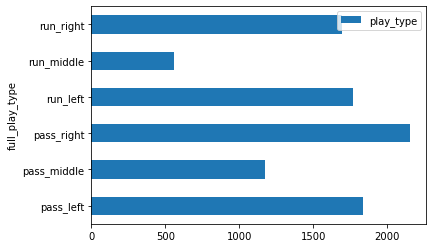

In [10]:
nedf.groupby(['full_play_type']).count()[['play_type']].plot(kind='barh')

In [11]:
nedf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100 * x / float(x.sum()))

,play_type
full_play_type,
pass_left,20.004356
pass_middle,12.795383
pass_right,23.445497
run_left,19.220298
run_middle,6.087335
run_right,18.447131


In [12]:
le = preprocessing.LabelEncoder()
le.fit(nedf.full_play_type)
nedf['full_play_type_code'] = le.transform(nedf['full_play_type'])

<AxesSubplot:ylabel='full_play_type_code'>

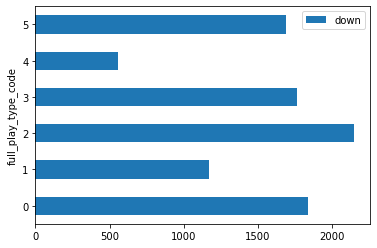

In [13]:
nedf.groupby(['full_play_type_code']).count()[['down']].plot(kind='barh')

In [14]:
def bucketize(val, size, count):
    i=0
    for i in range(count):
        if val <= (i+1)*size:
            return i
    return i
def bucketize_df(df):
    df['ydstogo'] = [bucketize(x, 4, 5) for x in df['ydstogo']]
    return df
nedf = bucketize_df(nedf)

In [15]:
nedf = pd.concat([nedf, pd.get_dummies(nedf['down'], prefix='down')], axis=1)
nedf = pd.concat([nedf, pd.get_dummies(nedf['ydstogo'], prefix='ydstogo')], axis=1)

In [16]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000
mean,52.606011,1.777633,1.627790,2.339323,0.450506,0.335293,0.200261,0.013939,0.154198,0.187412,0.573233,0.046717,0.038441
std,24.680543,0.810646,0.930719,1.705650,0.497571,0.472119,0.400218,0.117243,0.361158,0.390263,0.494635,0.211043,0.192268
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,73.000000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99.000000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
nedf['yardline_100']/=100

In [18]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000
mean,0.526060,1.777633,1.627790,2.339323,0.450506,0.335293,0.200261,0.013939,0.154198,0.187412,0.573233,0.046717,0.038441
std,0.246805,0.810646,0.930719,1.705650,0.497571,0.472119,0.400218,0.117243,0.361158,0.390263,0.494635,0.211043,0.192268
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.730000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.990000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#select important columns for input
X=nedf[['yardline_100', 'down', 'ydstogo', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0','ydstogo_0','ydstogo_1','ydstogo_2','ydstogo_3','ydstogo_4']]
#select result column for output
Y=nedf['full_play_type_code']
#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
the_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=64)

In [22]:
from sklearn.metrics import accuracy_score, explained_variance_score
pred = the_clf.predict(test_x)
acc =accuracy_score(test_y, pred)
print(acc)

0.25914634146341464


In [23]:
eacc = explained_variance_score(test_y, pred)
print(eacc)

-0.40090531187619893
